In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Cropping2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

1/1 [==============================] - 0s


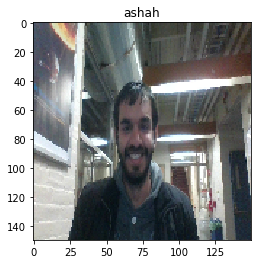


1/1 [==============================] - 0s


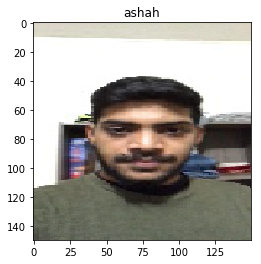


1/1 [==============================] - 0s


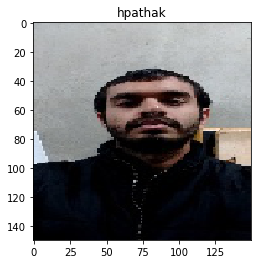


1/1 [==============================] - 0s


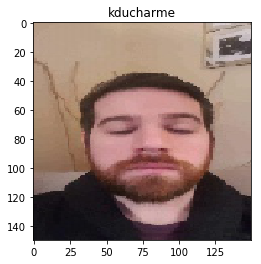


1/1 [==============================] - 0s


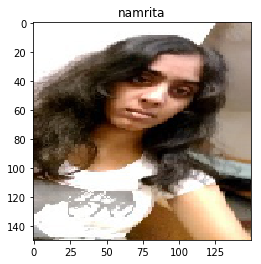


1/1 [==============================] - 0s


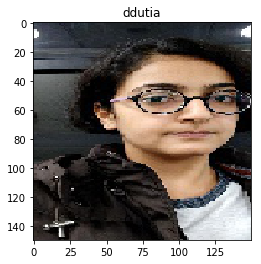


1/1 [==============================] - 0s


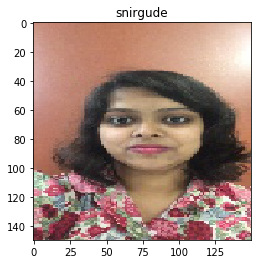


1/1 [==============================] - 0s


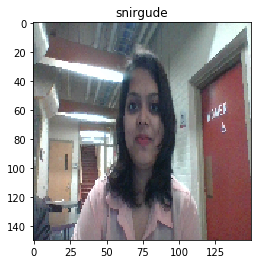


1/1 [==============================] - 0s


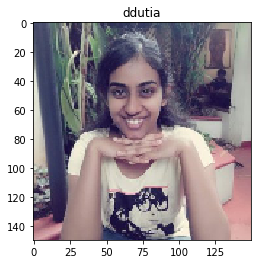


1/1 [==============================] - 0s


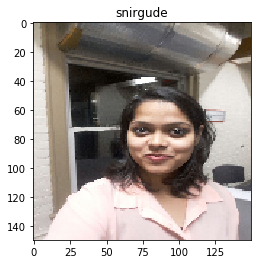


1/1 [==============================] - 0s


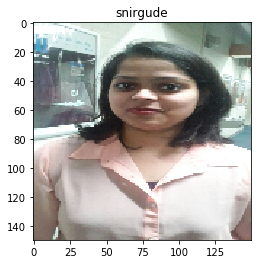


1/1 [==============================] - 0s


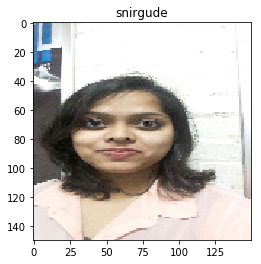


1/1 [==============================] - 0s


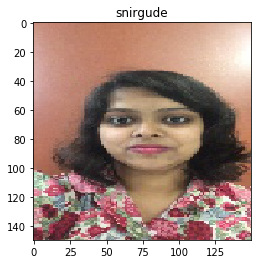


1/1 [==============================] - 0s


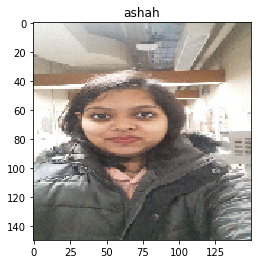


1/1 [==============================] - 0s


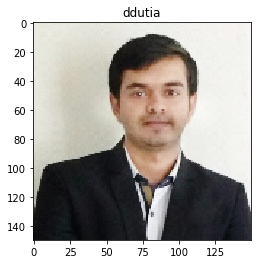


1/1 [==============================] - 0s


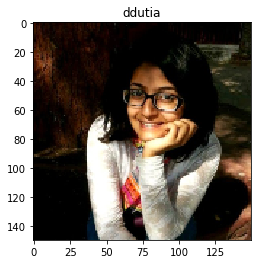


1/1 [==============================] - 0s


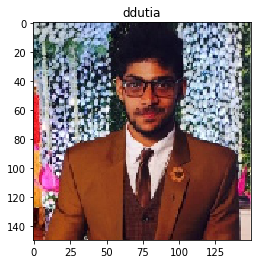

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150
paths = ['hh_t.jpg','aayush21403.jpg','harsh21049.jpg','kducharme3295.jpg','namritabackgroundfourth748.jpg','dharini21377.jpg','sanjuksha21721.jpg','test_img_s.jpg','nam1.jpg','s1.jpeg','s2.jpeg','s3.jpeg','sanjuksha21721.jpg','s4.jpeg','hh1.png','d1.jpg','aa1.jpg']
for i in paths: 
    image_path = '/home/harsh/ml/wpi/DL/h3/'+i
    image = load_img(image_path, target_size=(150, 150))
    plt.imshow(image)

    image = img_to_array(image)

    image = image / 255
    image = np.expand_dims(image, axis=0)

    # train_data_dir = 'data/train'
    # validation_data_dir = 'data/validation'
    # nb_train_samples = 30000
    # nb_validation_samples = 18000
    # epochs = 3
    # batch_size = 16

    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    #model.add(Cropping2D(cropping=((2,2),(2,2)) ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation('softmax'))
    model.load_weights('first_try_10.h5')
    pred = model.predict_classes(image)
    a = {0 : 'ashah', 1: 'ddutia', 2: 'hpathak', 3: 'kducharme' ,4: 'namrita' , 5:'snirgude'}
    plt.title(a.get(pred[0]))
    plt.show()
    print()

    # model.compile(loss='categorical_crossentropy',
    #               optimizer='rmsprop',
    #               metrics=['accuracy'])

    # # this is the augmentation configuration we will use for training
    # train_datagen = ImageDataGenerator(
    #     rescale=1. / 255,
    #     shear_range=0.2,
    #     zoom_range=0.2,
    #     horizontal_flip=True)

    # # this is the augmentation configuration we will use for testing:
    # # only rescaling
    # test_datagen = ImageDataGenerator(rescale=1. / 255)

    # train_generator = train_datagen.flow_from_directory(
    #     train_data_dir,
    #     target_size=(img_width, img_height),
    #     batch_size=batch_size,
    #     class_mode='categorical')

    # validation_generator = test_datagen.flow_from_directory(
    #     validation_data_dir,
    #     target_size=(img_width, img_height),
    #     batch_size=batch_size,
    #     class_mode='categorical')

    # model.fit_generator(
    #     train_generator,
    #     steps_per_epoch=nb_train_samples // batch_size,
    #     epochs=epochs,
    #     validation_data=validation_generator,
    #     validation_steps=nb_validation_samples // batch_size)

    # model.save_weights('first_try_3.h5')